In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.__version__ #pandas version

'0.17.1'

# Establish Connection to DB through SSH

In [3]:
from sshtunnel import SSHTunnelForwarder
import MySQLdb as db
import pandas as pd
import sys
import logging
#logging.basicConfig(stream=sys.stdout, level=logging.DEBUG) 
import paramiko
#ssh = paramiko.SSHClient()
#ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
#ssh.connect('ssicluster2.tk.informatik.tu-darmstadt.de',port = 12822, username='arun',password='ArunDss@123',allow_agent=False,look_for_keys=False)
localhost = '127.0.0.1'
user = 'root'
password='kUrsVbpyfFWF'
database = 'Energy_AD'
def query(q):
     with SSHTunnelForwarder(
          ('ssicluster2.tk.informatik.tu-darmstadt.de', 12822),
          allow_agent=False,
          ssh_username='arun',
          ssh_password = 'ArunDss@123',
          #remote_bind_address=('130.83.163.8', 3306)
          remote_bind_address=('127.0.0.1', 3306)
           
     ) as server:
          conn = db.connect(host=localhost,
          port=server.local_bind_port,
          user=user,
          passwd=password,
          db=database)

          return pd.read_sql_query(q, conn)

# Run the desired query 

In [4]:
#!/home/arun/anaconda2/bin/python
import MySQLdb as db1
import pandas as pd
import datetime
import pandas.io.sql as psql

now = datetime.datetime.now()
print "Start date and time using str method of datetime object:"
print str(now)

chunk_size = 604800
offset = 5259788
location = 'Torschlag_Trafo' + '%'
list_data = []
#Uncomment and run the below query to read all the data of particular location
#while True:
#    q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT %s" % (location,chunk_size))
#    print(q)
#    list_data.append(query(q))
#    offset += chunk_size
#    if len(list_data[-1]) < chunk_size:
#        break
#print("Query executed")
# print("Concatenating....")
# dfs = pd.concat(list_data)

#To read only specific rows of data
q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT %s OFFSET %s" % (location,chunk_size,offset))
print(q)
list_data.append(query(q))
dfs = pd.concat(list_data)



now1 = datetime.datetime.now()
print "End date and time using str method of datetime object:"
print str(now1)

print("Execution Completed")







Start date and time using str method of datetime object:
2016-12-23 17:40:37.194412
SELECT * FROM energy_sample_data1 where location like 'Torschlag_Trafo%' ORDER BY Serial_no LIMIT 604800 OFFSET 5259788
End date and time using str method of datetime object:
2016-12-23 17:44:43.915064
Execution Completed


In [5]:
dfs.shape

(259199, 16)

In [6]:
dfs.head()

,Serial_no,Date,Time,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
0,70482882,2015-12-30,00:00:01,233.40,233.14,232.83,10.87,14.70,13.87,8.04,8896.19,9187.99,0.96,18584,13450388.48,Torschlag_Trafo_30122015.csv
1,70482883,2015-12-30,00:00:02,233.40,233.14,232.83,10.87,14.70,13.87,7.76,8896.19,9187.99,0.96,18584,13450388.48,Torschlag_Trafo_30122015.csv
2,70482884,2015-12-30,00:00:03,233.51,233.35,232.99,10.83,14.73,13.77,7.76,8885.67,9168.27,0.96,18584,13450400.00,Torschlag_Trafo_30122015.csv
3,70482885,2015-12-30,00:00:04,233.51,233.35,232.99,10.83,14.73,13.77,7.76,8885.67,9168.27,0.96,18584,13450400.00,Torschlag_Trafo_30122015.csv
4,70482886,2015-12-30,00:00:05,233.51,233.35,232.99,10.83,14.73,13.77,7.76,8885.67,9168.27,0.96,18584,13450400.00,Torschlag_Trafo_30122015.csv


In [7]:
dfs.tail()

,Serial_no,Date,Time,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
259194,70831416,2015-12-31,23:59:55,237.51,237.14,236.98,10.42,17.51,11.98,10.17,9118.33,9458.78,0.94,20349,13965090.56,Torschlag_Trafo_31122015.csv
259195,70831417,2015-12-31,23:59:56,237.33,236.93,236.78,10.46,17.50,11.92,10.17,9099.92,9445.64,0.94,20349,13965100.80,Torschlag_Trafo_31122015.csv
259196,70831418,2015-12-31,23:59:57,237.33,236.93,236.78,10.46,17.50,11.92,10.17,9099.92,9445.64,0.94,20349,13965100.80,Torschlag_Trafo_31122015.csv
259197,70831419,2015-12-31,23:59:58,237.33,236.93,236.78,10.46,17.50,11.92,10.17,9099.92,9445.64,0.94,20349,13965100.80,Torschlag_Trafo_31122015.csv
259198,70831420,2015-12-31,23:59:59,237.33,236.93,236.78,10.46,17.50,11.92,13.29,9099.92,9445.64,0.94,20349,13965100.80,Torschlag_Trafo_31122015.csv


# Read the saved CSV


In [ ]:
dfs = pd.read_csv('Torschlag_df.csv',sep=',')

In [ ]:
dfs.shape #DataFrame containing all fields of Siedlerstr_Trafo

In [ ]:
columns_list = dfs.columns

# Run the below code when data is read from SQL

In [8]:
cols = 'DESC energy_sample_data1 '
columns_list = query(cols)

In [9]:
cols_sql = pd.DataFrame(columns_list)
print("Columns names:")
print(cols_sql.iloc[:,0])

Columns names:
0     Serial_no
1          Date
2          Time
3            V1
4            V2
5            V3
6            I1
7            I2
8            I3
9           I_N
10         Pges
11         Sges
12       CosPhi
13     Egy_trpt
14      Egy_con
15     Location
Name: Field, dtype: object


In [10]:
#df_cols = cols_sql.iloc[:,0] # use this to read columns from sql
#columns_names= df_cols.tolist()

print("Columns names:")
print(dfs.columns.tolist())

Columns names:
['Serial_no', 'Date', 'Time', 'V1', 'V2', 'V3', 'I1', 'I2', 'I3', 'I_N', 'Pges', 'Sges', 'CosPhi', 'Egy_trpt', 'Egy_con', 'Location']


In [11]:
import gc
gc.collect()
#dfs.iloc[0:2500000][1:].corr()
#dfs.ix[0:2500000,'Serial_no':].corr()

395

In [12]:
dfs.corr()

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Serial_no,1.000000,0.084444,0.043340,0.044119,0.007254,0.134356,0.251180,0.251828,0.176660,0.186779,-0.122121,0.166241,0.015149
V1,0.084444,1.000000,0.991166,0.992241,0.310970,0.156163,0.203346,0.067026,0.308282,0.303716,0.179091,-0.611891,-0.635800
V2,0.043340,0.991166,1.000000,0.995178,0.327944,0.112496,0.179263,0.021192,0.280442,0.274622,0.211819,-0.652549,-0.666805
V3,0.044119,0.992241,0.995178,1.000000,0.321414,0.140920,0.166199,0.036989,0.288810,0.283002,0.198497,-0.631195,-0.645329
I1,0.007254,0.310970,0.327944,0.321414,1.000000,0.218536,0.491445,-0.208431,0.679558,0.673171,0.559642,-0.402639,-0.436304
I2,0.134356,0.156163,0.112496,0.140920,0.218536,1.000000,0.319678,0.742225,0.760168,0.776896,-0.276732,0.035183,-0.017983
I3,0.251180,0.203346,0.179263,0.166199,0.491445,0.319678,1.000000,0.285531,0.763051,0.773032,0.055771,-0.097211,-0.210186
I_N,0.251828,0.067026,0.021192,0.036989,-0.208431,0.742225,0.285531,1.000000,0.422457,0.471697,-0.664329,0.079996,0.003154
Pges,0.176660,0.308282,0.280442,0.288810,0.679558,0.760168,0.763051,0.422457,1.000000,0.988405,0.135051,-0.164543,-0.251075
Sges,0.186779,0.303716,0.274622,0.283002,0.673171,0.776896,0.773032,0.471697,0.988405,1.000000,0.058948,-0.171056,-0.260976


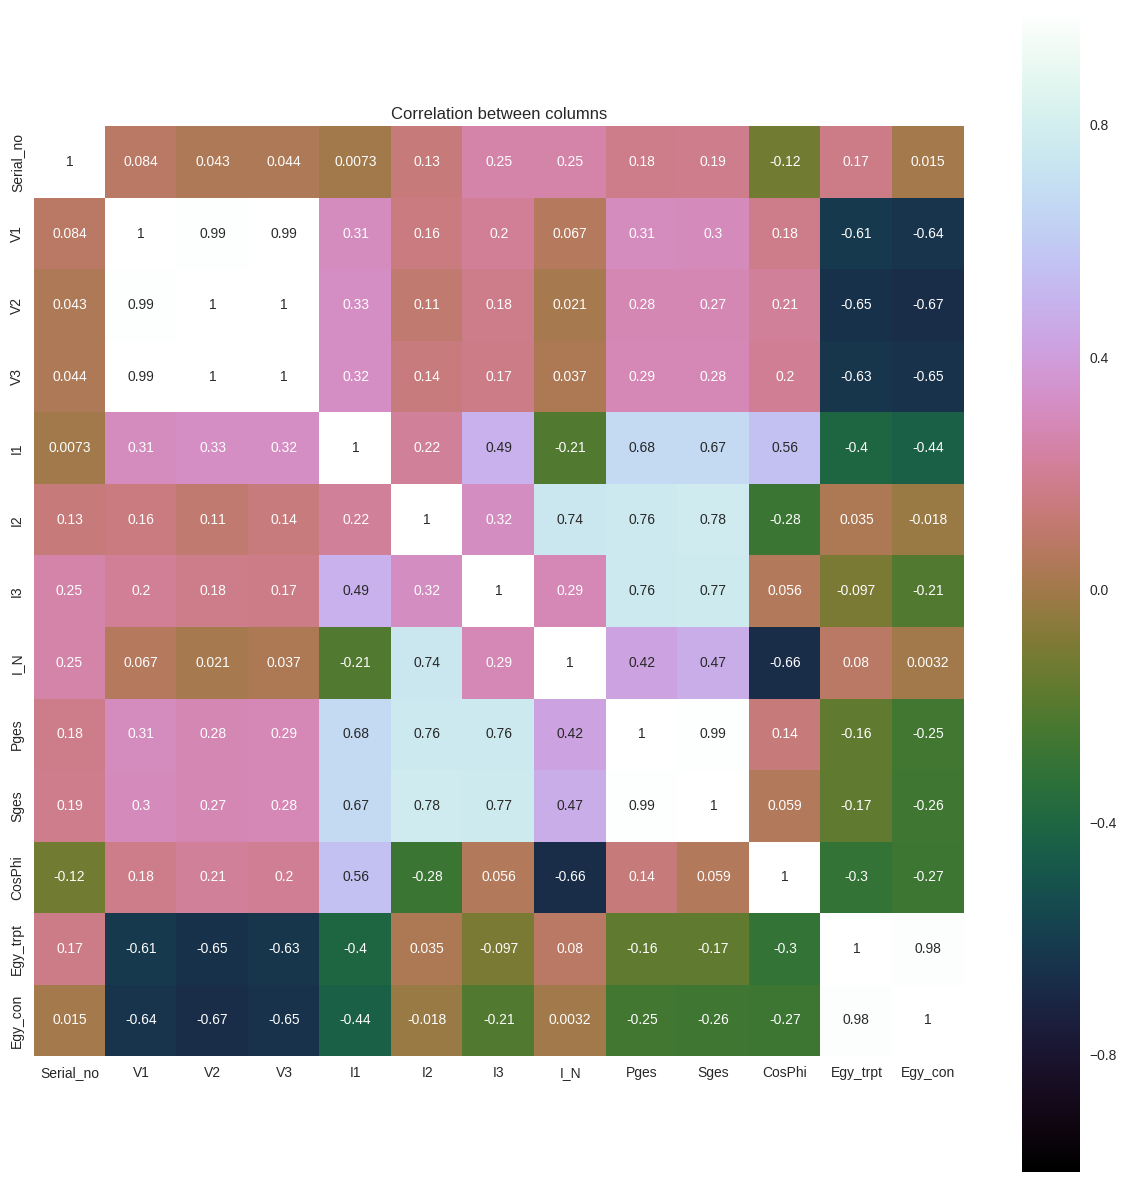

In [13]:
correlation = dfs.corr()
#plt.figure(figsize=(13,13))
fig = plt.figure(figsize=(15,15)) 
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between columns')

fig.savefig('Correlation_part1 Torschlag_Trafo_5259788_5518986.png')

# Statistics calculation implementation

# Plot statistics by grouping location 

In [14]:
dfs_loc = dfs.groupby('Location') # groupby location wise
#df_loc_part1 = dfs_drop_part1.groupby('Location') # groupby location wise

# Describe() : Produces the basic statistics of the DataFrame

In [15]:
dfs.drop(labels=['Time','Serial_no'],axis=1).describe()

,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
count,259199.000000,259199.000000,259199.000000,259199.000000,259199.000000,259199.000000,259199.000000,259199.00000,259199.000000,259199.000000,259199.000000,259199.000000
mean,234.422285,234.074796,233.979797,10.022543,20.021440,15.613408,13.797508,10144.80555,10692.966958,0.899462,20831.326105,19077519.019194
std,1.756752,1.727728,1.723161,4.373745,7.392892,5.541118,6.240515,3000.65107,3071.358532,0.054886,2401.349155,7616671.464815
min,229.140000,229.240000,229.050000,1.410000,3.880000,3.170000,4.330000,-68.34000,3638.390000,0.480000,18584.000000,13450388.480000
25%,233.260000,232.820000,232.770000,6.910000,15.040000,11.800000,9.570000,8357.26000,8808.120000,0.880000,18945.000000,13628166.400000
50%,234.360000,234.030000,233.910000,10.330000,18.370000,13.960000,12.040000,9458.78000,9934.610000,0.910000,19119.000000,13811152.640000
75%,235.700000,235.370000,235.240000,11.820000,23.090000,18.220000,16.330000,11309.52000,11837.930000,0.940000,24110.000000,29791800.320000
max,238.870000,238.720000,238.550000,43.320000,74.780000,55.140000,58.120000,36917.66000,38639.580000,0.990000,24188.000000,29959226.880000


# Saving the basic statistics to csv

In [16]:
dfs.drop(labels=['Time','Serial_no'],axis=1).describe().to_csv(r'Torschlag_Trafo_5259788_5518986_describe.csv',sep=',')

In [26]:
#dfs.iloc[0:500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_1.csv',sep=',')

In [27]:
#dfs.iloc[500000:1000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_2.csv',sep=',')

In [28]:
#dfs.iloc[1000000:1500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_3.csv',sep=',')

In [29]:
#dfs.iloc[1500000:2000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_4.csv',sep=',')

In [30]:
#dfs.iloc[2000000:2500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_5.csv',sep=',')

In [31]:
#dfs.iloc[2500000:3000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_6.csv',sep=',')

In [32]:
#dfs.iloc[3000000:3500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_7.csv',sep=',')

In [33]:
#dfs.iloc[3500000:4000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_8.csv',sep=',')

In [34]:
#dfs.iloc[4000000:4500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_9.csv',sep=',')

In [35]:
#dfs.iloc[4500000:-1][:].describe().to_csv(r'Torschlag_Trafo_corr_last.csv',sep=',')

# Below you will calculate the correlation on the data grouped by location

In [17]:
#dfs_grp_loc = dfs.iloc[0:500000][:]

In [18]:
#dfs_grp_loc.groupby('Location').describe()

In [17]:
dfs_loc.corr(method='pearson', min_periods=1)

CosPhi   Egy_con  Egy_trpt  \
Location                                                               
Torschlag_Trafo_30122015.csv CosPhi     1.000000 -0.205801 -0.219795   
                             Egy_con   -0.205801  1.000000  0.876550   
                             Egy_trpt  -0.219795  0.876550  1.000000   
                             I1         0.479138  0.126403  0.153127   
                             I2        -0.410911  0.482193  0.454621   
                             I3        -0.187656  0.326729  0.461399   
                             I_N       -0.766070  0.394505  0.357374   
                             Pges      -0.057731  0.506944  0.551474   
                             Serial_no -0.238397  0.997256  0.876793   
                             Sges      -0.172813  0.516908  0.573191   
                             V1         0.069355  0.197807  0.309084   
                             V2         0.088699  0.179325  0.299110   
                             V3         0.063639  0.228297  0.341067   
Torschlag_Trafo_31012016.csv CosPhi     1.000000 -0.295647 -0.189611   
                             Egy_con   -0.295647  1.000000  0.867182   
                             Egy_trpt  -0.189611  0.867182  1.000000   
                             I1         0.548935 -0.207395 -0.202544   
                             I2        -0.456071  0.222983  0.140588   
                             I3         0.096597  0.315086  0.338929   
                             I_N       -0.697207  0.350748  0.281625   
                             Pges       0.000727  0.180014  0.145338   
                             Serial_no -0.307384  0.999100  0.865671   
                             Sges      -0.045784  0.192196  0.153410   
                             V1        -0.421200  0.527603  0.409073   
                             V2        -0.382142  0.402315  0.291604   
                             V3        -0.389989  0.426265  0.324836   
Torschlag_Trafo_31122015.csv CosPhi     1.000000 -0.165062 -0.249975   
                             Egy_con   -0.165062  1.000000  0.863015   
                             Egy_trpt  -0.249975  0.863015  1.000000   
                             I1         0.513752  0.284255  0.226260   
                             I2        -0.141701  0.419051  0.324963   
                             I3         0.076447  0.648707  0.677578   
                             I_N       -0.638714  0.418542  0.432331   
                             Pges       0.185335  0.571324  0.510833   
                             Serial_no -0.213104  0.992593  0.888006   
                             Sges       0.097398  0.592721  0.533060   
                             V1         0.288306  0.143493 -0.037848   
                             V2         0.310822  0.058397 -0.125222   
                             V3         0.306739  0.062210 -0.122670   

                                              I1        I2        I3  \
Location                                                               
Torschlag_Trafo_30122015.csv CosPhi     0.479138 -0.410911 -0.187656   
                             Egy_con    0.126403  0.482193  0.326729   
                             Egy_trpt   0.153127  0.454621  0.461399   
                             I1         1.000000  0.071212  0.276095   
                             I2         0.071212  1.000000  0.155835   
                             I3         0.276095  0.155835  1.000000   
                             I_N       -0.341246  0.783663  0.205711   
                             Pges       0.567971  0.753280  0.605015   
                             Serial_no  0.123997  0.476213  0.359953   
                             Sges       0.546035  0.754431  0.656298   
                             V1        -0.009740  0.136957 -0.096278   
                             V2         0.020093  0.106588 -0.083329   
                             V3         0.024868  0.152939 -0.082571   
Torschlag

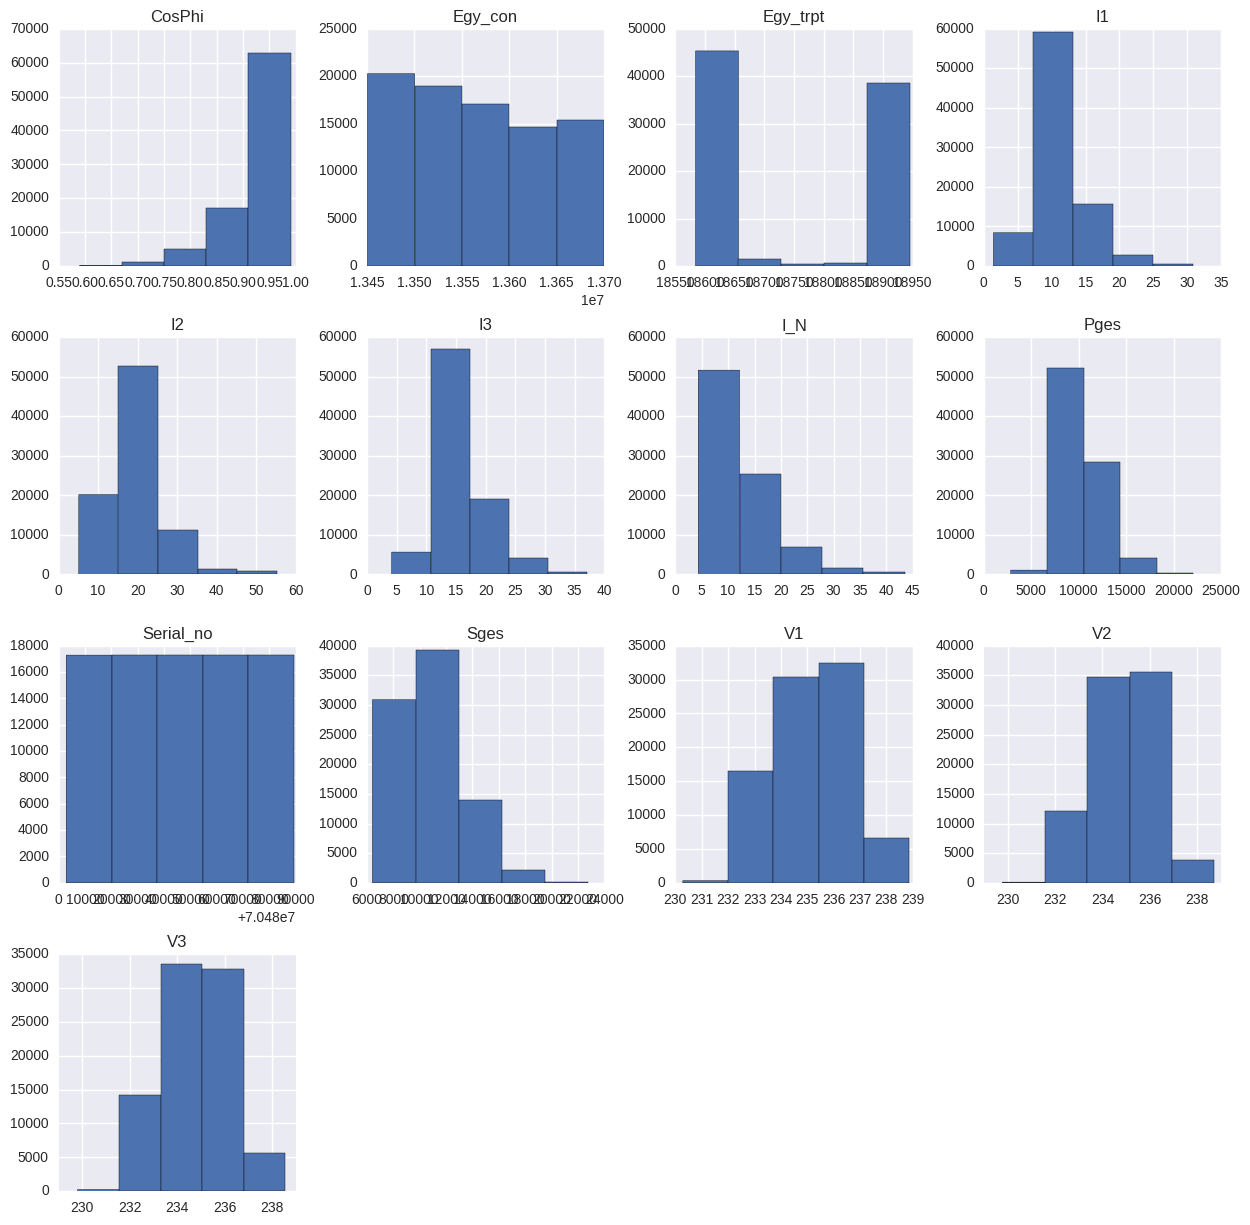

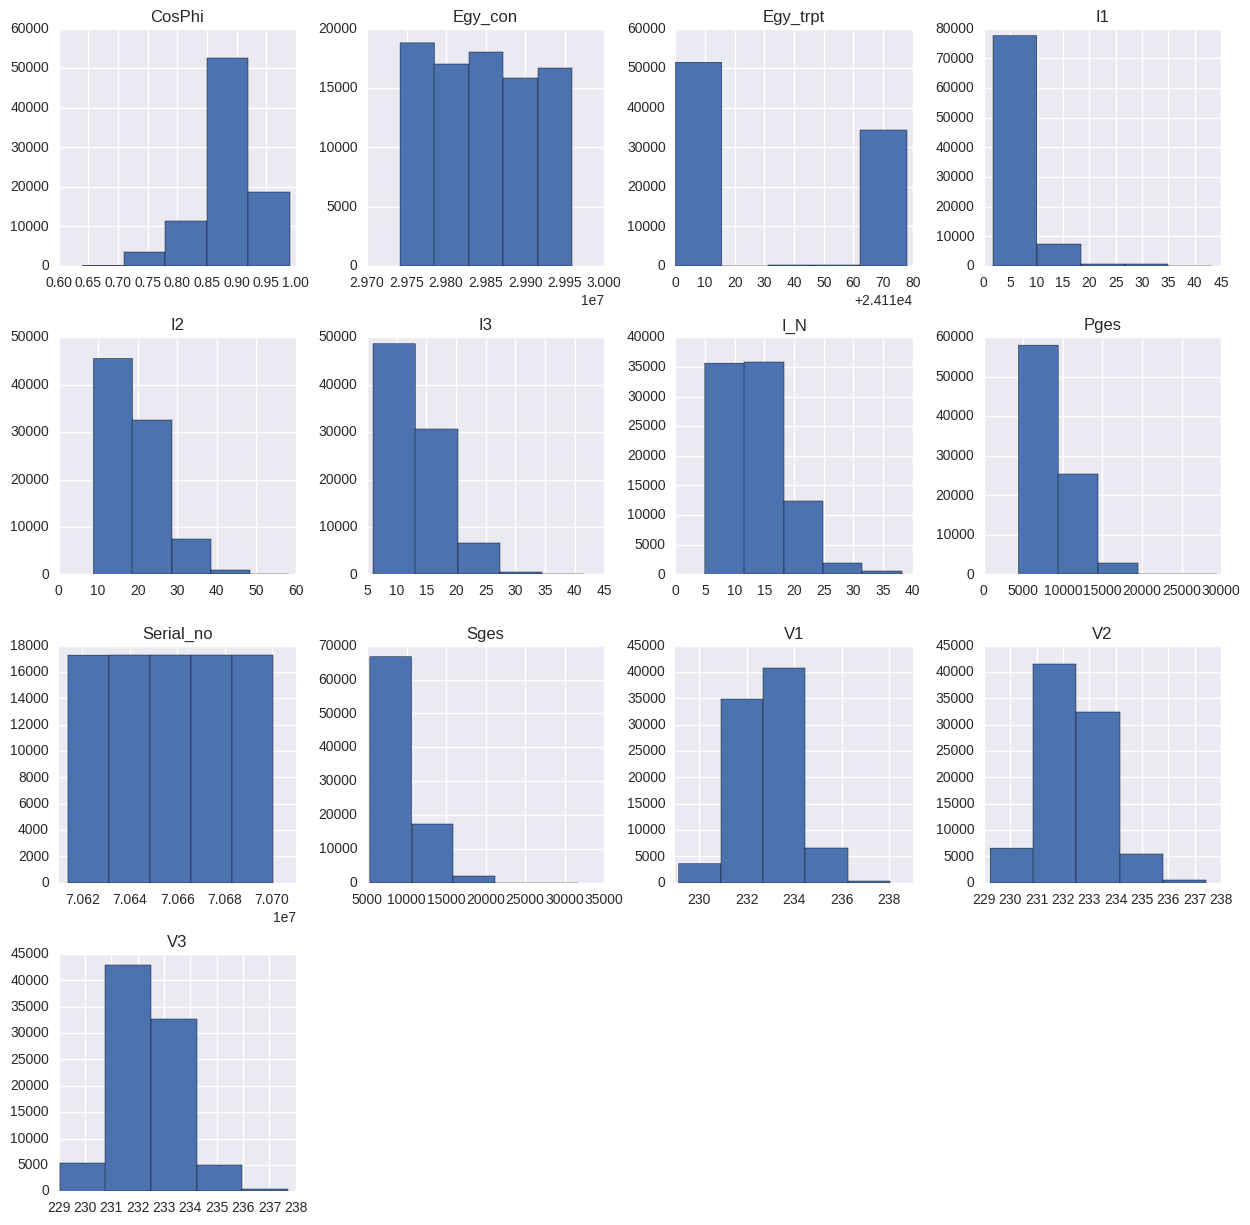

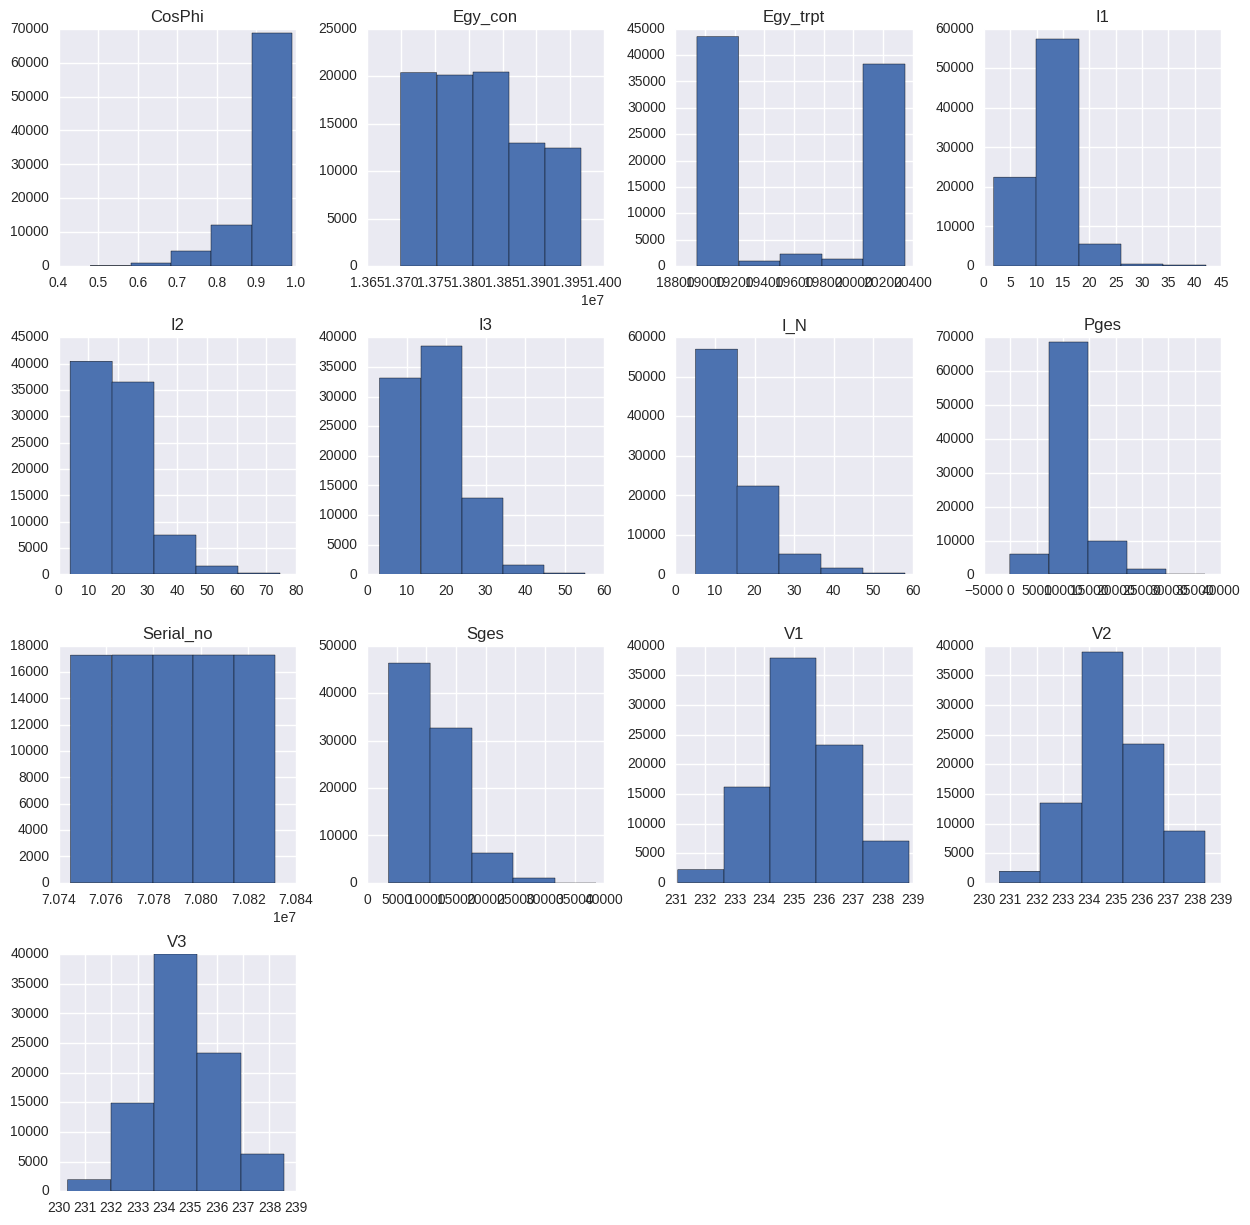

In [18]:
dfs_loc.hist(bins=5,figsize=(15,15))
plt.savefig('Torschlag_Trafo_groupby_location_pearson_corr_5259788_5518986.png')
    

# Compute only the mean of the data grouped by location and visualize

In [19]:
df_st_mean = dfs_loc.mean()
df_st_mean

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Location,,,,,,,,,,,,,
Torschlag_Trafo_30122015.csv,70526081,235.133202,234.867719,234.754179,11.418784,19.653739,15.425406,12.532253,10369.715701,10920.742400,0.914434,18749.315768,13567107.748429
Torschlag_Trafo_31012016.csv,70657150,232.836462,232.441701,232.402991,7.319008,19.789068,13.917784,13.774318,9057.574739,9536.210859,0.878898,24141.890046,29847641.636740
Torschlag_Trafo_31122015.csv,70788220,235.297199,234.914979,234.782230,11.329854,20.621509,17.497033,15.085938,11007.128812,11621.950250,0.905054,19602.748403,13817743.894504


In [20]:
df_st_mean.to_csv(r'Torschlag_trafo_mean_groupby_location_5259788_5518986.csv',sep=',')

# Plot the groupby location 

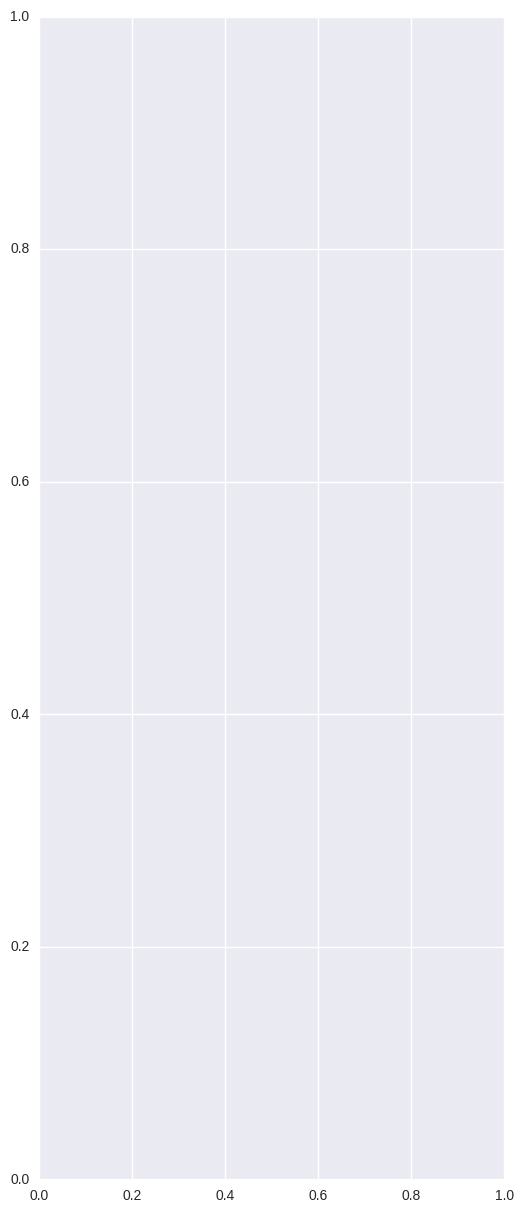

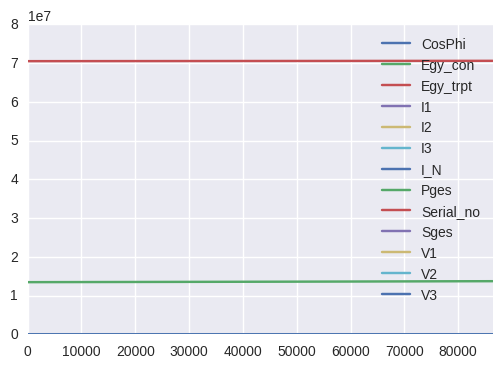

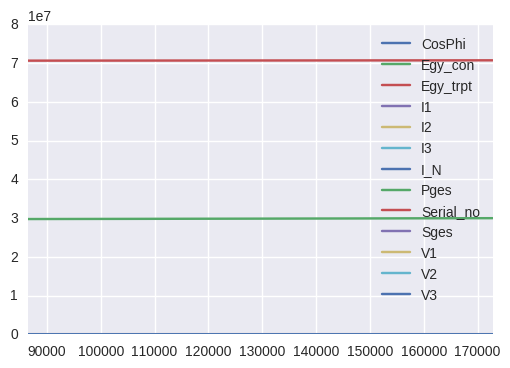

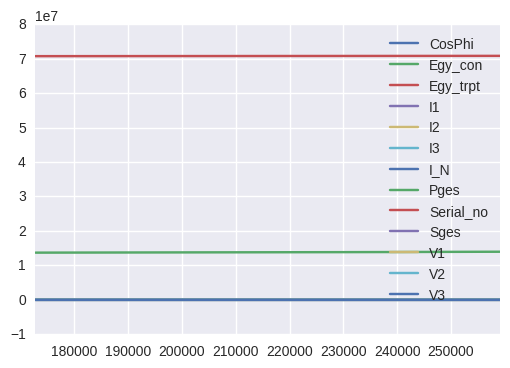

In [21]:
fig1,ax2 = plt.subplots(figsize=(6,15))
bp = dfs_loc.plot(kind='kde', ax2 = ax2, legend=False)


# PCA implementation

In [22]:
dfs_drop = dfs.drop(labels=['Serial_no', 'Date', 'Time','Location'],axis=1)

In [23]:
dfs_drop.columns

Index([u'V1', u'V2', u'V3', u'I1', u'I2', u'I3', u'I_N', u'Pges', u'Sges',
       u'CosPhi', u'Egy_trpt', u'Egy_con'],
      dtype='object')

In [24]:
X = dfs_drop.iloc[:,0:6].values
X

array([[ 233.4 ,  233.14,  232.83,   10.87,   14.7 ,   13.87],
       [ 233.4 ,  233.14,  232.83,   10.87,   14.7 ,   13.87],
       [ 233.51,  233.35,  232.99,   10.83,   14.73,   13.77],
       ..., 
       [ 237.33,  236.93,  236.78,   10.46,   17.5 ,   11.92],
       [ 237.33,  236.93,  236.78,   10.46,   17.5 ,   11.92],
       [ 237.33,  236.93,  236.78,   10.46,   17.5 ,   11.92]])

In [25]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [26]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [27]:
Y_sklearn.shape

(259199, 6)

In [28]:
n_components = pd.DataFrame(Y_sklearn, columns=('V1', 'V2', 'V3', 'I1', 'I2', 'I3'))
n_components.head()

,V1,V2,V3,I1,I2,I3
0,-1.074571,-0.073655,-0.68970,0.295441,-0.042239,-0.079885
1,-1.074571,-0.073655,-0.68970,0.295441,-0.042239,-0.079885
2,-0.933013,-0.147618,-0.66778,0.291649,-0.004096,-0.096706
3,-0.933013,-0.147618,-0.66778,0.291649,-0.004096,-0.096706
4,-0.933013,-0.147618,-0.66778,0.291649,-0.004096,-0.096706


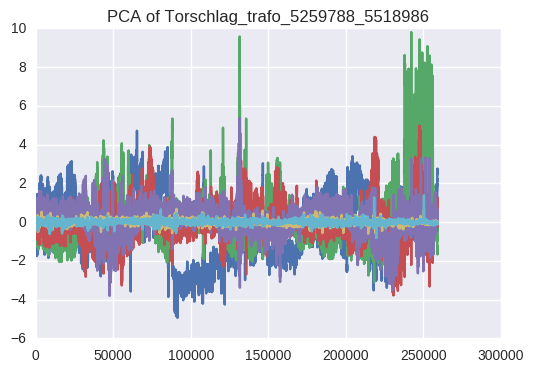

In [29]:
fig = plt.figure() 
plt.legend(loc='upper right')
plt.plot(n_components)
plt.title("PCA of Torschlag_trafo_5259788_5518986")

fig.savefig('PCA of Torschlag_Trafo_5259788_5518986.png')


# Plot voltage vs time

# Plot V1 and I1 vs Time of all locations extracted from SQL.

In [30]:
#dfs.iloc[500000:1000000][:].groupby('Location').describe()
dfs['Location'].unique()

array(['Torschlag_Trafo_30122015.csv', 'Torschlag_Trafo_31012016.csv',
       'Torschlag_Trafo_31122015.csv'], dtype=object)

In [31]:
def plotfunc(ax, a, b):
    return ax.plot(a, b)

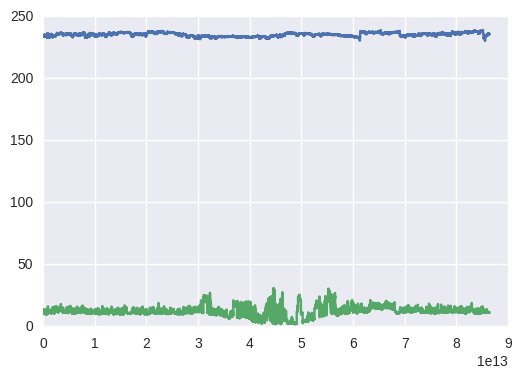

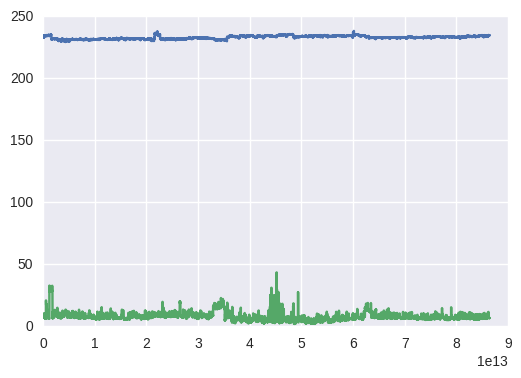

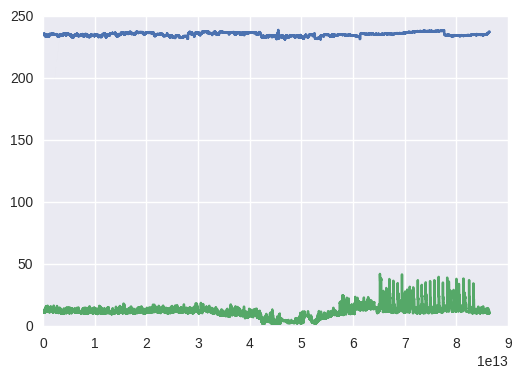

In [32]:
for loc in iter(dfs['Location'].unique()):
    fig, ax = plt.subplots(1,1)
    b = dfs['V1'].where (dfs['Location'] == loc)
    b1 = dfs['I1'].where (dfs['Location'] == loc)
    a = dfs['Time'].where (dfs['Location'] == loc)
    l1 = plotfunc(ax, a, b)
    l2 = plotfunc(ax, a, b1)
    plt.savefig('V1_I1_Time of %s.png' % loc)
    plt.show()